# Dados sobre Feminicídio nos anos de 2015 e 2016

### Dados retirados de http://www.cnmp.mp.br/portal/institucional/enasp/acoes


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium import plugins
from folium.plugins import HeatMap


%matplotlib inline


low_memory=False


In [2]:
dados2015 = 'Dados_feminicídio_2015-2016_-_06.12.2016_ASCOM_1.xlsx'
df = pd.read_excel(dados2015, sheet_name=0, index_col=0)
dados2016 = 'Dados_compilados_2016-2017_ASCOM_3.xlsx'
df2 = pd.read_excel(dados2016, sheet_name=0, index_col=0)

In [3]:
df = df.head(27)
df2 = df2.head(27)

In [4]:
latitude = [-9.972463, -9.667137, -3.133842, 0.039045,-12.970382, -3.730536, -15.79983, -20.319933,
            -16.67992, -2.532066, -15.598917, -20.461719, -19.918339,-1.452005 , -7.120034, -25.433171,
           -8.054278, -5.092628, -22.908892, -5.786403,-30.033914, -8.764597, 2.821734, -27.593237, -23.550483, -10.912647, -10.184567]

longitude = [-67.812749, -35.737958, -60.020165, -51.050099, -38.512382,-38.521777 ,-47.863711, -40.336296, -49.255032,
             -44.299996, -56.094894,-54.612237,-43.940102, -48.503072, -34.876211, -49.27147, -34.881256,-42.810155, 
            -43.177138, -35.207978, -51.229154, -63.903943, -60.672061, -48.543736, -46.633106, -37.053451, -48.333654]


In [5]:
df.describe()

,Investigação em curso,Total de baixas,Total,Unnamed: 10
count,24.000000,27.000000,27.000000,0.0
mean,45.416667,59.111111,99.481481,NaN
std,77.160993,63.769617,121.111954,NaN
min,5.000000,0.000000,0.000000,NaN
25%,10.500000,11.000000,29.000000,NaN
50%,19.500000,44.000000,70.000000,NaN
75%,45.250000,73.500000,119.000000,NaN
max,372.000000,255.000000,576.000000,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, ACRE to TOCANTINS
Data columns (total 14 columns):
Número de inquéritos informado     27 non-null object
Número de inquéritos – dez/2016    27 non-null object
Denúncias                          24 non-null object
Arquivamento                       19 non-null object
Desclassificação                   16 non-null object
Investigação em curso              24 non-null float64
Total de baixas                    27 non-null float64
Total                              27 non-null float64
Baixa do estoque                   27 non-null object
Unnamed: 10                        0 non-null float64
% Denúncias                        27 non-null object
% Arquivamentos                    27 non-null object
% Desclassificações                27 non-null object
% Diligências                      27 non-null object
dtypes: float64(4), object(10)
memory usage: 3.2+ KB


In [7]:
df.rename(columns={'MP / ESTADOS': 'MP/ESTADOS',
                   'Número de inquéritos informado': 'NúmerodeInquéritosInformado',
                   'Número de inquéritos – dez/2016': 'NúmeroDeInquéritos–dez/2016',
                   'Denúncias' : 'Den2015',
                   'Investigação em curso': 'InvestigaçãoEmCurso',
                   'Total de baixas': 'TotalDeBaixas',
                   'Baixa do estoque': 'BaixaDoEstoque',
                   '% Denúncias': '%Denúncias',
                   '% Arquivamentos': '%Desclassificações',
                   '% Diligências' : '%Diligências',
                   '% Desclassificações' : '%Desclassificações'
                  }, inplace=True)
df2.rename(columns={'MP / ESTADOS': 'MP/ESTADOS',
                    'Denúncias': 'Den2016',
                   'Investigação em curso': 'InvestigaçãoEmCurso',
                   'Total de baixas': 'TotalDeBaixas',
                   'Baixa do estoque': 'BaixaDoEstoque',
                   '% Denúncias': '%Denúncias',
                   '% Arquivamentos': '%Desclassificações',
                   '% Diligências' : '%Diligências',
                   '% Desclassificações' : '%Desclassificações'
                  }, inplace=True)

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, ACRE  to TOCANTINS
Data columns (total 12 columns):
Den2016                26 non-null object
Arquivamento           25 non-null object
Desclassificação       25 non-null object
InvestigaçãoEmCurso    25 non-null object
TotalDeBaixas          27 non-null object
Total                  27 non-null float64
BaixaDoEstoque         27 non-null object
Unnamed: 8             0 non-null object
%Denúncias             27 non-null object
%Desclassificações     27 non-null object
%Desclassificações     27 non-null object
%Diligências           27 non-null object
dtypes: float64(1), object(11)
memory usage: 2.7+ KB


In [9]:
df

,NúmerodeInquéritosInformado,NúmeroDeInquéritos–dez/2016,Den2015,Arquivamento,Desclassificação,InvestigaçãoEmCurso,TotalDeBaixas,Total,BaixaDoEstoque,Unnamed: 10,%Denúncias,%Desclassificações,%Desclassificações,%Diligências
MP / ESTADOS,,,,,,,,,,,,,,
ACRE,50,50,32,3,4,11.0,39.0,50.0,0.78,NaN,0.64,0.06,0.08,0.22
ALAGOAS,103,103,43,1,NaN,59.0,44.0,103.0,0.427184,NaN,0.417476,0.00970874,0,0.572816
AMAZONAS,178,156,67,22,38,29.0,127.0,156.0,0.814103,NaN,0.429487,0.141026,0.24359,0.185897
AMAPÁ,47,44,16,3,0,25.0,19.0,44.0,0.431818,NaN,0.363636,0.0681818,0,0.568182
BAHIA,395,0,NaN,NaN,NaN,NaN,0.0,0.0,-,NaN,-,-,-,-
CEARÁ,181,249,86,7,33,123.0,126.0,249.0,0.506024,NaN,0.345382,0.0281124,0.13253,0.493976
DISTRITO FEDERAL,99,99,90,NaN,NaN,9.0,90.0,99.0,0.909091,NaN,0.909091,0,0,0.0909091
ESPÍRITO SANTO,45,76,56,3,3,14.0,62.0,76.0,0.815789,NaN,0.736842,0.0394737,0.0394737,0.184211
GOIÁS,181,70,50,NaN,NaN,20.0,50.0,70.0,0.714286,NaN,0.714286,0,0,0.285714


In [10]:
df = df.sort_values(['Den2015'], ascending=False)

In [11]:
df2 = df2.sort_values(['Den2016'], ascending=False)

In [12]:
df

,NúmerodeInquéritosInformado,NúmeroDeInquéritos–dez/2016,Den2015,Arquivamento,Desclassificação,InvestigaçãoEmCurso,TotalDeBaixas,Total,BaixaDoEstoque,Unnamed: 10,%Denúncias,%Desclassificações,%Desclassificações,%Diligências
MP / ESTADOS,,,,,,,,,,,,,,
SÃO PAULO,320,320,244,11,0,65.0,255.0,320.0,0.796875,NaN,0.7625,0.034375,0,0.203125
MINAS GERAIS,576,576,192,9,3,372.0,204.0,576.0,0.354167,NaN,0.333333,0.015625,0.00520833,0.645833
PARANÁ,155,155,134,5,1,15.0,140.0,155.0,0.903226,NaN,0.864516,0.0322581,0.00645161,0.0967742
DISTRITO FEDERAL,99,99,90,NaN,NaN,9.0,90.0,99.0,0.909091,NaN,0.909091,0,0,0.0909091
CEARÁ,181,249,86,7,33,123.0,126.0,249.0,0.506024,NaN,0.345382,0.0281124,0.13253,0.493976
RIO DE JANEIRO,553,121,72,3,0,46.0,75.0,121.0,0.619835,NaN,0.595041,0.0247934,0,0.380165
PERNAMBUCO,117,117,72,NaN,NaN,45.0,72.0,117.0,0.615385,NaN,0.615385,0,0,0.384615
AMAZONAS,178,156,67,22,38,29.0,127.0,156.0,0.814103,NaN,0.429487,0.141026,0.24359,0.185897
MATO GROSSO,70,72,62,3,NaN,7.0,65.0,72.0,0.902778,NaN,0.861111,0.0416667,0,0.0972222


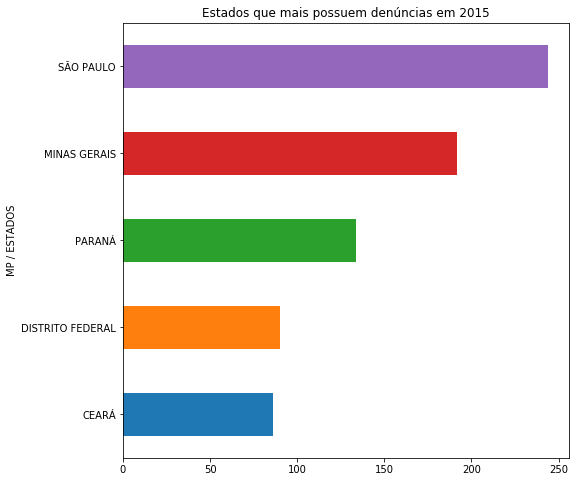

In [13]:
df['Den2015'].dropna().head(5).sort_values().plot(kind='barh', figsize=(8,8), title ='Estados que mais possuem denúncias em 2015')


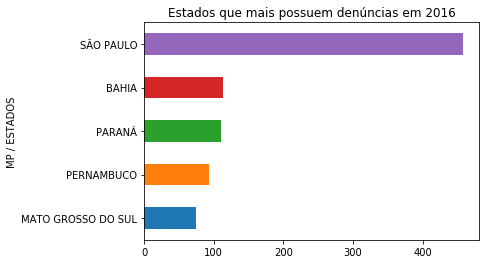

In [14]:
df2['Den2016'].dropna().head(5).sort_values().plot(kind='barh', title = 'Estados que mais possuem denúncias em 2016')

In [15]:
a  = df['Den2015'].sum()
b = df2['Den2016'].sum() 
a+b

2894

In [16]:
dfs = df[['Den2015']]

In [17]:
dfs['Den2016'] =df2[['Den2016']]

c:\users\leona\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
dfs


,Den2015,Den2016
MP / ESTADOS,,
SÃO PAULO,244,458
MINAS GERAIS,192,NaN
PARANÁ,134,111
DISTRITO FEDERAL,90,63
CEARÁ,86,57
RIO DE JANEIRO,72,41
PERNAMBUCO,72,93
AMAZONAS,67,59
MATO GROSSO,62,62


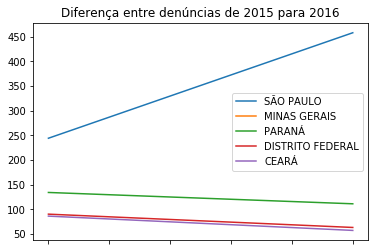

In [19]:
for i in range(5):
    dfs.iloc[i].dropna().plot(legend='true', title='Diferença entre denúncias de 2015 para 2016')

In [20]:
lat = pd.Series(latitude)
lon = pd.Series(longitude)
dfs['Latitude'] = lat.values
dfs['Longitude'] = lon.values

c:\users\leona\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\leona\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [21]:
dfs

,Den2015,Den2016,Latitude,Longitude
MP / ESTADOS,,,,
SÃO PAULO,244,458,-9.972463,-67.812749
MINAS GERAIS,192,NaN,-9.667137,-35.737958
PARANÁ,134,111,-3.133842,-60.020165
DISTRITO FEDERAL,90,63,0.039045,-51.050099
CEARÁ,86,57,-12.970382,-38.512382
RIO DE JANEIRO,72,41,-3.730536,-38.521777
PERNAMBUCO,72,93,-15.799830,-47.863711
AMAZONAS,67,59,-20.319933,-40.336296
MATO GROSSO,62,62,-16.679920,-49.255032


In [22]:
mapa = folium.Map(location=[-15.96132908, -47.90039063], tiles='cartodbpositron' ,zoom_start= 3.75)

HeatMap(zip(dfs['Latitude'], dfs['Longitude']), radius = 30).add_to(mapa)
mapa

In [23]:
n_investigado = df['Den2015'].sum() - df['InvestigaçãoEmCurso'].sum()
investigado = df['InvestigaçãoEmCurso'].sum()

x = [n_investigado, investigado]
legenda = 'NãoInvestigado Investigado'.split()

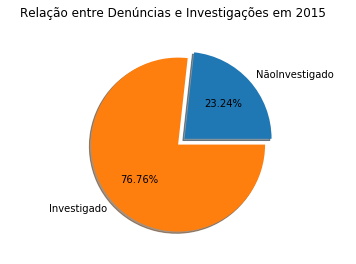

In [24]:
plt.axis('equal')
plt.pie(x, autopct="%.2f%%", explode = [0.1, 0], labels = legenda, shadow = 'true')
plt.suptitle('Relação entre Denúncias e Investigações em 2015')
plt.show()

In [25]:
n_investigado2 = df2['Den2016'].sum() - df2['InvestigaçãoEmCurso'].sum()
investigado2= df2['InvestigaçãoEmCurso'].sum()

y = [n_investigado2, investigado2]

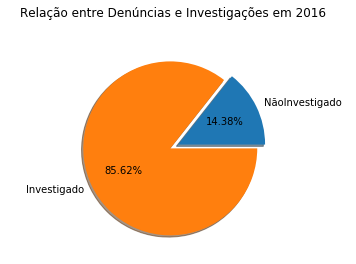

In [26]:
plt.axis('equal')
plt.pie(y, autopct="%.2f%%", explode = [0, 0.1], labels = legenda, shadow = 'true')
plt.suptitle('Relação entre Denúncias e Investigações em 2016')
plt.show()